For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
import random
#Generate 20 random numbers between 0 and 20
x = random.sample(range(0,21), 21)
print(x)
print(len(x))

[17, 16, 13, 9, 2, 15, 5, 19, 3, 14, 8, 11, 18, 7, 10, 12, 6, 1, 4, 20, 0]
21


In [3]:
a=-2
b=1
y=[]
for i in range(0,21):
    y.append(a*x[i]+b)
print(y)    
print(len(y))

[-33, -31, -25, -17, -3, -29, -9, -37, -5, -27, -15, -21, -35, -13, -19, -23, -11, -1, -7, -39, 1]
21


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
th0=0
th1=0
alpha=0.0001
error=[]
hminy=[]
hminymulx=[]
h=[]

x    y   h(x)      error
17   -33   0       1089
16   -31   0       961
13   -25   0       625
9   -17   0       289
2   -3   0       9
15   -29   0       841
5   -9   0       81
19   -37   0       1369
3   -5   0       25
14   -27   0       729
8   -15   0       225
11   -21   0       441
18   -35   0       1225
7   -13   0       169
10   -19   0       361
12   -23   0       529
6   -11   0       121
1   -1   0       1
4   -7   0       49
20   -39   0       1521
0   1   0       1


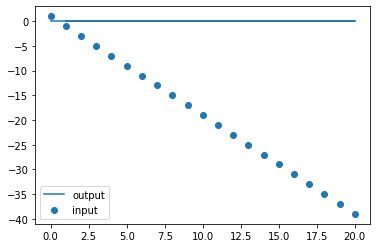

In [5]:
#func to calcolate Hypothesis
def hypo(o1,o2,arr):
    h=[]
    for i in range (0,len(arr)):
        h.append(o1 + o2 *arr[i])
    return h    

#func to calculate error
def error(o1,o2,arr1,arr2):
    r=[]
    h=hypo(o1,o2,arr1)
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])**2)
    return r

#func to calculate h(x)-y(x)
def hminy(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append(h[i]-arr2[i])
    return r

#func to calculate (h(x)-y(x))*x
def hminymulx(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])*arr1[i])
    return r
    
####################################################
print('x','  ','y',' ','h(x)','    ','error')
y1=hypo(th0,th1,x)
er=error(th0,th1,x,y)
hmy=hminy(th0,th1,x,y)
hmyxx=hminymulx(th0,th1,x,y)
for i in range (0,len(x)):
    print(x[i],' ',y[i],' ',y1[i],'     ',er[i])
    h.append(th0 + th1*x[i])
   
    
    
plt.scatter(x,y,label='input')
plt.plot(x,h,label='output')
plt.legend()
plt.show()    

In [6]:
#here cost function
def cost(arr):
    sm=0
    sm = numpy.sum(arr)
    print('cost funtion equal ',(1/(2*len(arr)))*sm) 
    return (1/(2*len(arr)))*sm
cost(er)    

cost funtion equal  253.83333333333331


253.83333333333331

In [7]:
#here calculate the optimum value  for theta0 and theta1
#sm0= numpy.sum(hminy)
#sm1=numpy.sum(hminymulx)
#mag0=(alpha*(1/len(hminy))*sm0)
#mag1=(alpha*(1/len(hminy))*sm1)
arrth0=[]
arrth1=[]

tloss=[]
reg=[]
for i in range (0,300):
    
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    ernew=error(th0,th1,x,y)
    tloss.append(cost(ernew))
    print(cost(ernew))
    fth0=hminy(th0,th1,x,y)    
    sm0= numpy.sum(fth0)   
    mag0=(alpha*(1/len(fth0))*sm0) 
    th0=th0-mag0
    arrth0.append(th0)
    fth1=hminymulx(th0,th1,x,y)    
    sm1= numpy.sum(fth1)   
    mag1=(alpha*(1/len(fth1))*sm1)            
    th1=th1-mag1
    arrth1.append(th1)
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    
    print(th0,'  ',th1)




cost funtion equal  253.83333333333331
cost funtion equal  253.83333333333331
253.83333333333331
-0.0018999999999999998    -0.026331433333333334
cost funtion equal  246.9111698571837
cost funtion equal  246.9111698571837
246.9111698571837
-0.003773478566666666    -0.05230113026587778
cost funtion equal  240.17790652424748
cost funtion equal  240.17790652424748
240.17790652424748
-0.005620800088544121    -0.0779140606854889
cost funtion equal  233.62838839968202
cost funtion equal  233.62838839968202
233.62838839968202
-0.0074423239478497785    -0.10317512619883937
cost funtion equal  227.2576012227013
cost funtion equal  227.2576012227013
227.2576012227013
-0.009238404589256155    -0.12808916106953264
cost funtion equal  221.0606675676937
cost funtion equal  221.0606675676937
221.0606675676937
-0.011009391587727697    -0.15266093314332796
cost funtion equal  215.03284311009935
cost funtion equal  215.03284311009935
215.03284311009935
-0.012755629715425595    -0.1768951447606537
cost fu

In [8]:
#y1new=hypo(th0,th1,x)

#ernew=error(th0,th1,x,y)

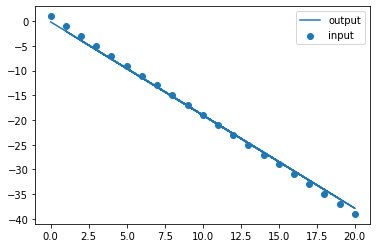

In [9]:
plt.scatter(x,y,label='input')
plt.plot(x,y1new,label='output')
plt.legend()
plt.show()

#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

In [10]:
from sklearn.metrics import r2_score

s = r2_score(y,y1new)

print(s)

0.9967993088683615


#### Plot loss vs. epochs

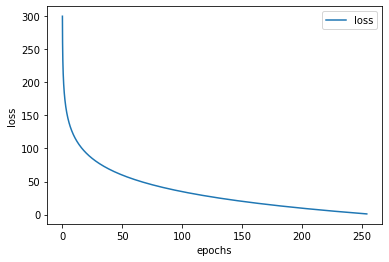

In [11]:
n=[]
j=1
for i in range (0,300):
    n.append(int(j))
    j=j+1
    


plt.plot(tloss,n,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()    

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

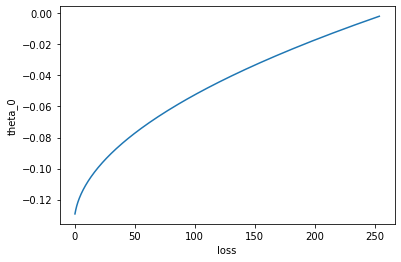

In [12]:
plt.plot(tloss,arrth0)
plt.ylabel('theta_0')
plt.xlabel('loss')
#plt.legend()
plt.show()    

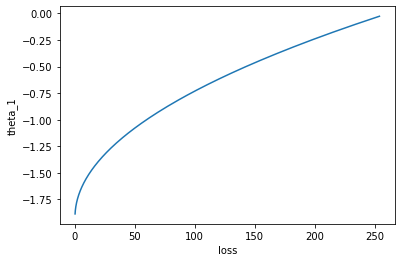

In [13]:
plt.plot(tloss,arrth1)
plt.ylabel('theta_1')
plt.xlabel('loss')
#plt.legend()
plt.show()    

#### Plot all regression lines till converge

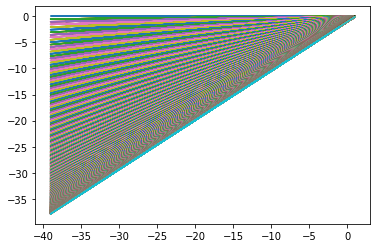

In [14]:

   
for i in range (0,len(reg)):
    plt.plot(y,reg[i])
    #plt.ylabel('epoch')
    #plt.xlabel('hypo')
    #plt.legend()
    
plt.show()
    

#### Plot the best regression line

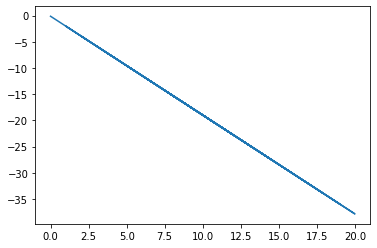

In [15]:
plt.plot(x,y1new,label='output')

plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [16]:
def GD(x,y):
    th0=0
    th1=0
    alpha=0.0001
    error=[]
    hminy=[]
    hminymulx=[]
    h=[]
    
    
    y1=hypo(th0,th1,x)
    er=error(th0,th1,x,y)
    hmy=hminy(th0,th1,x,y)
    hmyxx=hminymulx(th0,th1,x,y)
    for i in range (0,len(x)):
        print(x[i],' ',y[i],' ',y1[i],'     ',er[i])
        h.append(th0 + th1*x[i])
   
    
    
    plt.scatter(x,y,label='input')
    plt.plot(x,h,label='output')
    plt.legend()
    plt.show()    
    
    
    cost(er)
    
    
    
    arrth0=[]
    arrth1=[]
    tloss=[]
    reg=[]
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    for i in range (0,300):
        
        
        ernew=error(th0,th1,x,y)
        tloss.append(cost(ernew))
        print(cost(ernew))
        fth0=hminy(th0,th1,x,y)    
        sm0= numpy.sum(fth0)   
        mag0=(alpha*(1/len(fth0))*sm0) 
        th0=th0-mag0
        arrth0.append(th0)
        fth1=hminymulx(th0,th1,x,y)    
        sm1= numpy.sum(fth1)   
        mag1=(alpha*(1/len(fth1))*sm1)            
        th1=th1-mag1
        arrth1.append(th1)
        y1new=hypo(th0,th1,x)
        reg.append(y1new)
        
        
        
        
    plt.scatter(x,y,label='input')
    plt.plot(x,y1new,label='output')
    plt.legend()
    plt.show()
    
    
   

    s = r2_score(y,y1new)

    print('accuracy rquals ',100*s,'%') 

    for i in range (0,len(reg)):
        plt.plot(y,reg[i])
        #plt.ylabel('epoch')
        #plt.xlabel('hypo')
        #plt.legend()
    
    plt.show()
   
    
    
    plt.plot(x,y1new,label='output')

    plt.show()

